In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import mglearn
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test,y_test)))

테스트 세트 점수: 0.92


# Cross-Validation

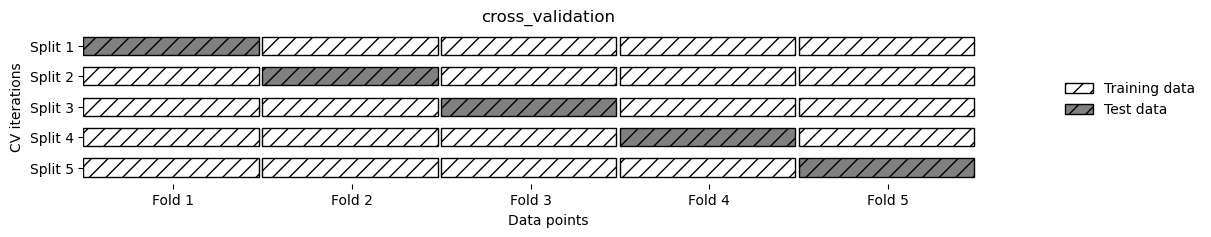

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차검중 점수:", scores)

교차검중 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
print("교차검중 점수:", scores)

교차검중 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [6]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [7]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.00928235, 0.0069921 , 0.00599718, 0.00597477, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [8]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.009282,0.0,0.966667,0.966667
1,0.006992,0.0,1.000000,0.966667
2,0.005997,0.0,0.933333,0.983333
3,0.005975,0.0,0.966667,0.983333
4,0.000000,0.0,1.000000,0.975000


In [9]:
print("평균 시간과 점수:\n", res_df.mean())

평균 시간과 점수:
 fit_time       0.005649
score_time     0.000000
test_score     0.973333
train_score    0.975000
dtype: float64


In [10]:
print('Iris 레이블:\n',iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


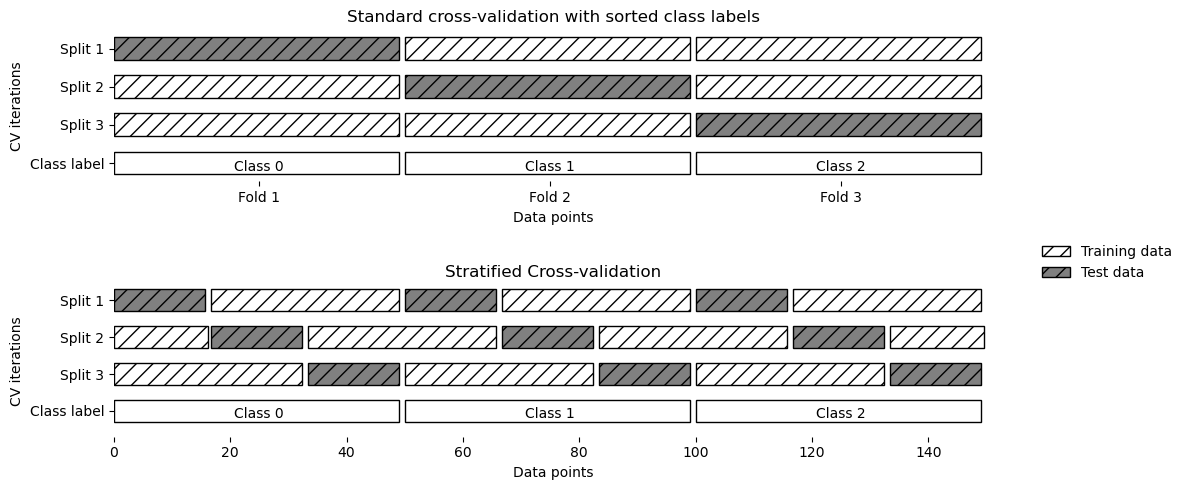

In [11]:
mglearn.plots.plot_stratified_cross_validation()

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [13]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [14]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=22)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.96, 0.98, 0.94])

In [16]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 회수:', len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 회수: 150
평균 정확도: 0.97


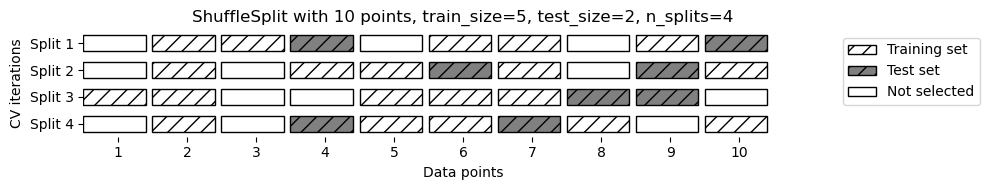

In [17]:
mglearn.plots.plot_shuffle_split()

In [18]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수:\n",scores)

교차 검증 점수:
 [0.97333333 1.         0.97333333 0.93333333 0.97333333 0.94666667
 0.94666667 0.96       0.96       0.96      ]


In [19]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=22)

groups = [0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [1.  0.6 1. ]


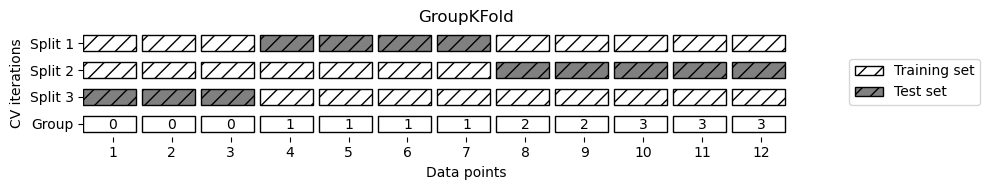

In [20]:
mglearn.plots.plot_group_kfold()

In [21]:
from sklearn.model_selection import StratifiedKFold

logreg = LogisticRegression(max_iter=1000)

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print("교차 검증 점수:\n", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수: 0.965


# Grid Search

In [23]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)
print('훈련 세트의 크기: {}  테스트 세트의 크기: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [.001, .01, .1, 1, 10, 100]:
    for C in [.001, .01, .1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score> best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최고 매개변수: ", best_parameters)

훈련 세트의 크기: 112  테스트 세트의 크기: 38
최고 점수: 0.97
최고 매개변수:  {'C': 100, 'gamma': 0.1}


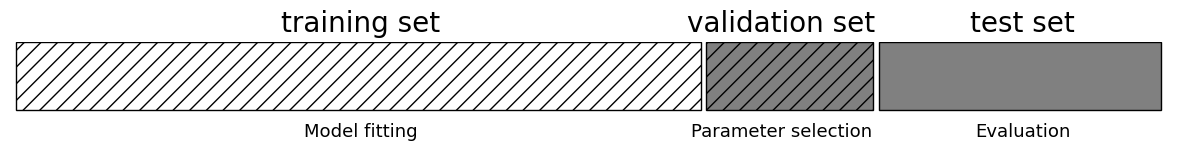

In [24]:
mglearn.plots.plot_threefold_split()

In [25]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=22)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('검증 세트에서 최고 점수:{:.2f}'.format(best_score))
print('최적 매개변수: ',best_parameters)
print('최적 매개변수에서 테스트 세트 점수: {:.2f}'.format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수:1.00
최적 매개변수:  {'C': 100, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.95


In [26]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score=score
            best_parameters = {'C':C,'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, gamma=0.001)

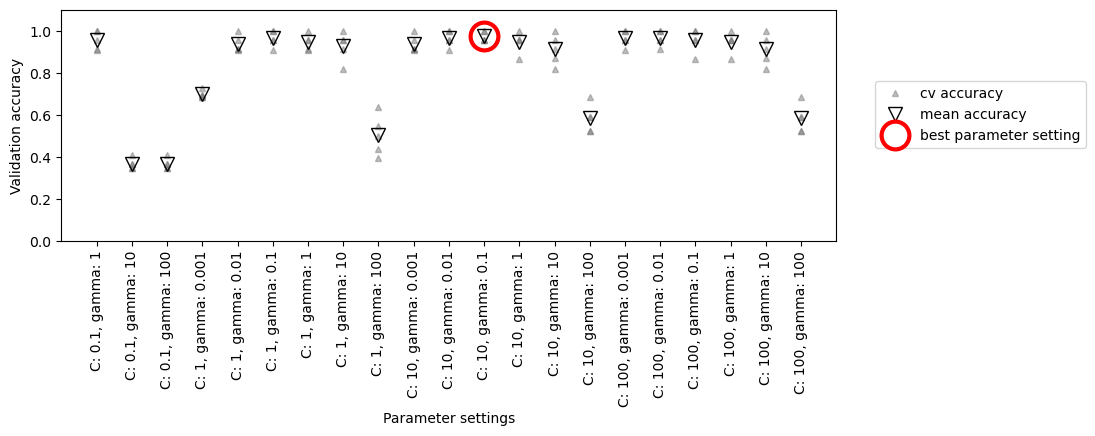

In [27]:
mglearn.plots.plot_cross_val_selection()

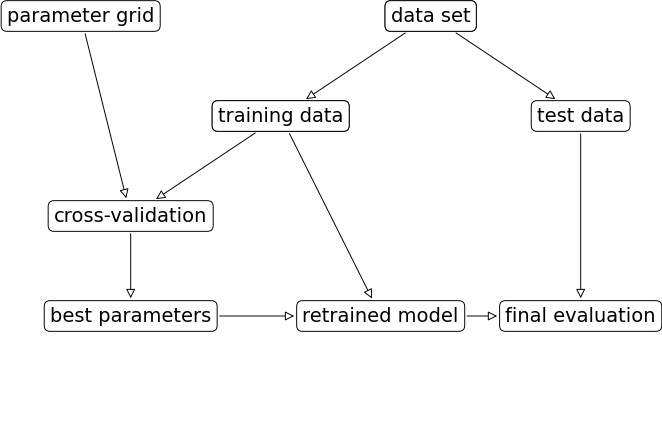

In [28]:
mglearn.plots.plot_grid_search_overview()

In [29]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]}
print('매개변수 그리드:\n', param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [30]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [33]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.95


In [34]:
print('최적의 매개변수:', grid_search.best_params_)
print('최고 교차 검증 점수: {:.2f}'.format(grid_search.best_score_))

최적의 매개변수: {'C': 1, 'gamma': 0.1}
최고 교차 검증 점수: 0.98


In [35]:
print('최고 성능 모델:\n', grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=1, gamma=0.1)


In [36]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.003563,0.000992,0.001295,0.00314,0.003125
std_fit_time,0.006088,0.000885,0.000735,0.00628,0.00625
mean_score_time,0.000215,0.000404,0.000795,0.003131,0.000204
std_score_time,0.00043,0.000495,0.000743,0.006263,0.000407
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.318182,0.318182,0.318182,0.318182,0.318182


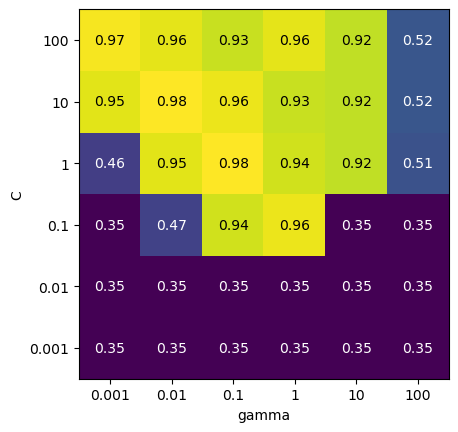

In [37]:
scores = np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')
plt.show()

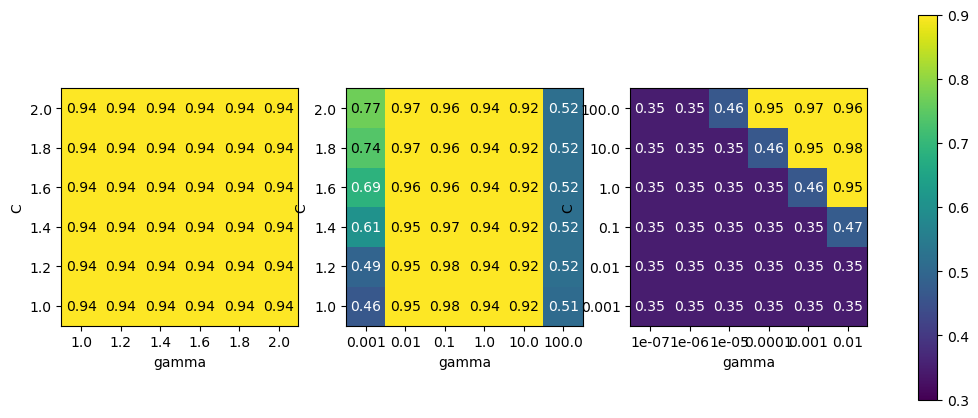

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)

plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [39]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [40]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)
print('최적 파라미터:', grid_search.best_params_)
print('최고 교차 검증 점수: {:.2f}'.format(grid_search.best_score_))

최적 파라미터: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.98


In [41]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000941,0.0018,0.0002,0.003224,0.006519,0.003493,0.0,0.002476,0.0004,0.0,0.003137,0.0,0.0,0.0,0.003117,0.0,0.003135,0.003123,0.003117,0.0,0.002711,0.0,0.003125,0.003117,0.001713,0.0,0.0,0.003133,0.0,0.001342,0.001054,0.003134,0.0,0.0,0.00161,0.0,0.003134,0.0,0.0,0.0,0.00281,0.0
std_fit_time,0.001882,0.000398,0.0004,0.00469,0.007456,0.006042,0.0,0.004952,0.0008,0.0,0.006274,0.0,0.0,0.0,0.006234,0.0,0.00627,0.006245,0.006234,0.0,0.005421,0.0,0.006251,0.006234,0.003426,0.0,0.0,0.006266,0.0,0.000732,0.000637,0.006268,0.0,0.0,0.00322,0.0,0.006268,0.0,0.0,0.0,0.00562,0.0
mean_score_time,0.005818,0.001304,0.000399,0.0,0.000402,0.000602,0.003133,0.000217,0.000201,0.0,0.0,0.0,0.003125,0.0,0.003125,0.000802,0.0,0.0,0.003133,0.0,0.0,0.003127,0.0,0.003124,0.0,0.0,0.0,0.0,0.003733,0.000598,0.0002,0.0,0.0,0.003125,0.003133,0.0,0.0,0.0,0.003135,0.003124,0.0,0.0
std_score_time,0.007134,0.000405,0.000798,0.0,0.000805,0.000801,0.006266,0.000434,0.000403,0.0,0.0,0.0,0.006251,0.0,0.006251,0.001604,0.0,0.0,0.006266,0.0,0.0,0.006255,0.0,0.006247,0.0,0.0,0.0,0.0,0.006061,0.000488,0.000399,0.0,0.0,0.00625,0.006266,0.0,0.0,0.0,0.00627,0.006248,0.0,0.0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.913043,0.956522,0.347826,0.347826,0.347826,0.956522,0.956522,0.956522,0.956522,0.521739,0.956522,0.956522,0.956522,0.956522,0.956522,0.521739,0.956522,0.956522,0.956522,0.956522,0.956522,0.521739,0.347826,0.913043,1.0,1.0,1.0,1.0
spl

In [42]:
param_grid = {'C':[.001,.01,.1,1,10,100],
              'gamma':[.001,.01,.1,1,10,100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data,iris.target)
print('교차 검증 점수:', scores)
print('교차 검증 평균 점수:',scores.mean())

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.9800000000000001


In [43]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [44]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = [{'kernel': ['rbf'],
               'C': loguniform(0.001, 100),
               'gamma': loguniform(0.001, 100)},
              {'kernel': ['linear'],
               'C': loguniform(0.001, 100)}]

In [46]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20,
                                 random_state=22, n_jobs=-1)
rand_search.fit(X_train, y_train)
print("최적 파라미터:", rand_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(rand_search.best_score_))

최적 파라미터: {'C': 10.257825480113636, 'gamma': 0.005864732377741973, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.98


In [47]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1,
                                  random_state=22, n_jobs=-1)
halv_search.fit(X_train, y_train)
print()
print("최적 파라미터:", halv_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(halv_search.best_score_))

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits

최적 파라미터: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.98


In [48]:
print('자원 리스트:', halv_search.n_resources_)
print('후보 리스트:', halv_search.n_candidates_)

자원 리스트: [30, 90]
후보 리스트: [42, 14]


# Evaluation Metrics and Scoring

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train,X_test,y_train,y_test = train_test_split(digits.data, y, random_state=22)

In [50]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 레이블의 레이블:', np.unique(pred_most_frequent))
print('테스트 점수: {:.2f}'.format(dummy_majority.score(X_test,y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수: {:.2f}'.format(tree.score(X_test,y_test)))

테스트 점수: 0.93


In [52]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.84
logreg 점수: 0.98


In [53]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('confusion matrix:\n', confusion)

confusion matrix:
 [[403   2]
 [  5  40]]


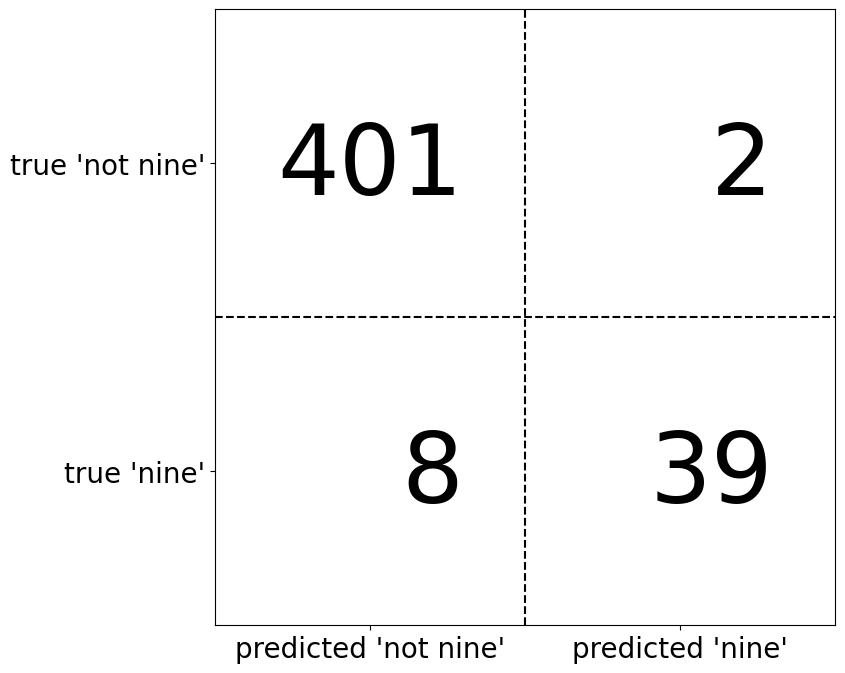

In [54]:
mglearn.plots.plot_confusion_matrix_illustration()

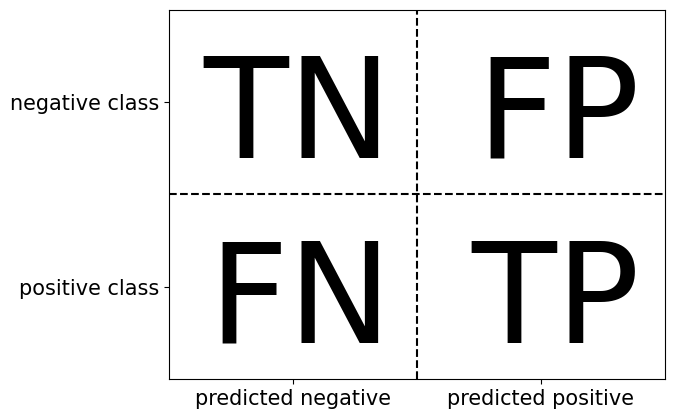

In [55]:
mglearn.plots.plot_binary_confusion_matrix()

In [56]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[405   0]
 [ 45   0]]

무작위 더미 모델:
[[371  34]
 [ 43   2]]

결정 트리:
[[394  11]
 [ 19  26]]

로지스틱 회귀
[[403   2]
 [  5  40]]


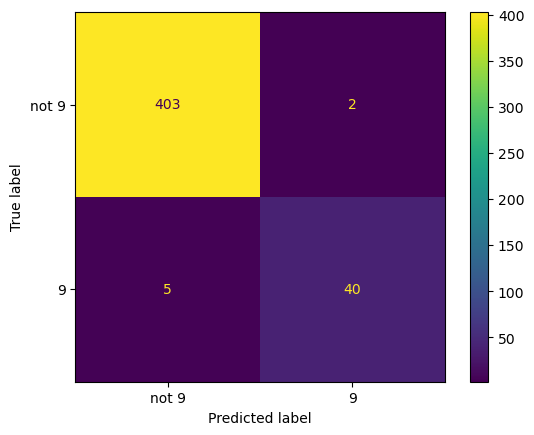

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg,X_test,y_test, display_labels=['not 9', '9'])
plt.show()

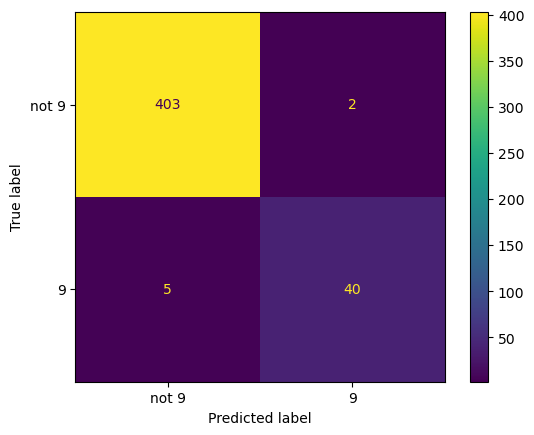

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['not 9', '9'])
plt.show()

In [59]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.05
트리 모델의 f1 score: 0.63
로지스틱 회귀 모델의 f1 score: 0.92


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not 9", "9"], zero_division=0))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.95       405
           9       0.00      0.00      0.00        45

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450



In [61]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not 9", "9"]))

              precision    recall  f1-score   support

       not 9       0.90      0.92      0.91       405
           9       0.06      0.04      0.05        45

    accuracy                           0.83       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.83      0.82       450



In [62]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not 9", "9"]))

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       405
           9       0.95      0.89      0.92        45

    accuracy                           0.98       450
   macro avg       0.97      0.94      0.96       450
weighted avg       0.98      0.98      0.98       450



In [63]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
svc = SVC(gamma=.05).fit(X_train, y_train)

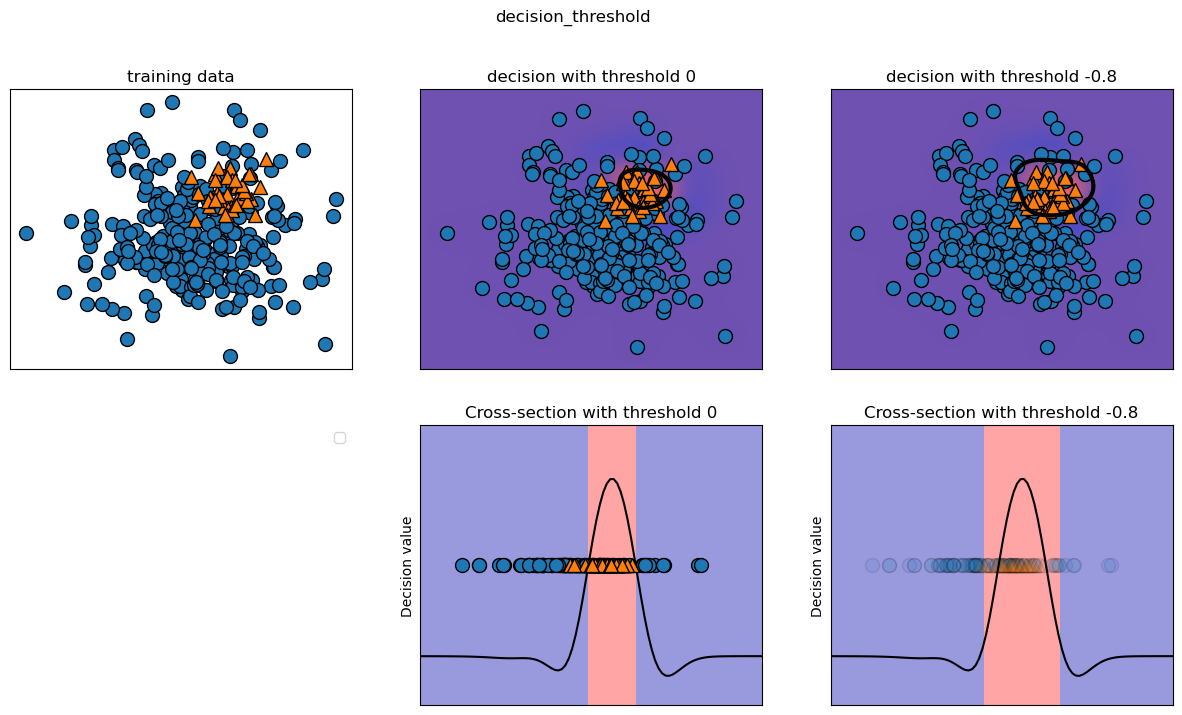

In [64]:
mglearn.plots.plot_decision_threshold()

In [65]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       102
           1       0.45      0.45      0.45        11

    accuracy                           0.89       113
   macro avg       0.70      0.70      0.70       113
weighted avg       0.89      0.89      0.89       113



In [66]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.99

In [67]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       102
           1       0.36      0.91      0.51        11

    accuracy                           0.83       113
   macro avg       0.67      0.87      0.71       113
weighted avg       0.93      0.83      0.86       113



In [68]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

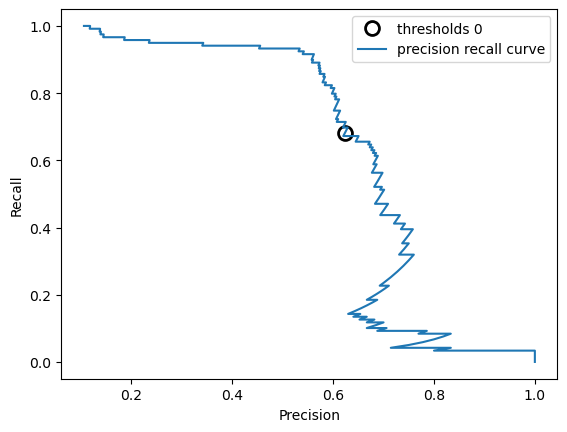

In [69]:
X,y = make_blobs(n_samples=(4000,500), cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22)

svc = SVC(gamma=.05).fit(X_train,y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o',
         markersize=10,label='thresholds 0', fillstyle='none', c='k', mew=2 )
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')
plt.show()

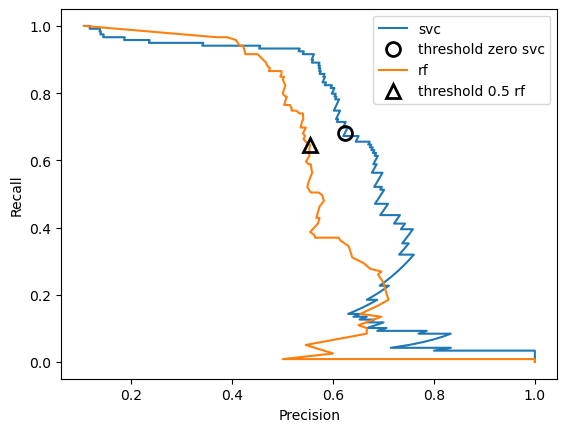

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
 y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
 markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [71]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.585
svc의 f1_score: 0.651


In [72]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.564
svc의 평균 정밀도: 0.658


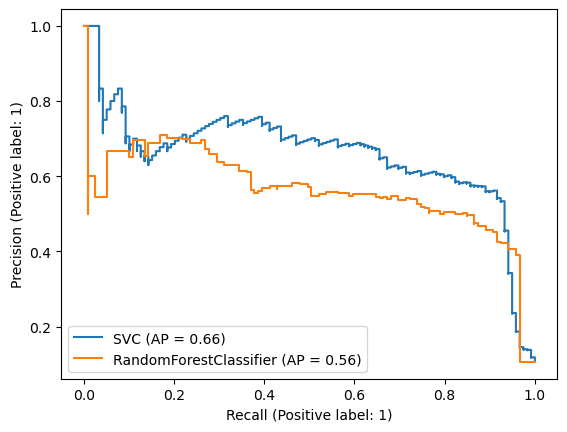

In [73]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()

PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

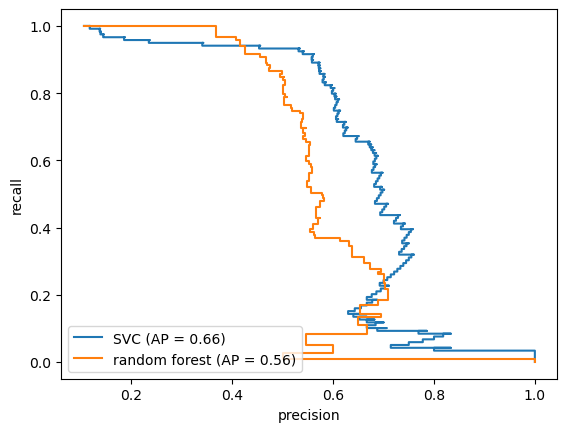

In [74]:
fig, ax = plt.subplots()

disp = PrecisionRecallDisplay(precision=recall, recall=precision,
                              average_precision=ap_svc,
                              estimator_name='SVC')
disp.plot(ax=ax)

disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf,
                              average_precision=ap_rf,
                              estimator_name='random forest')
disp.plot(ax=ax)
ax.set(xlabel='precision', ylabel='recall')
plt.show()

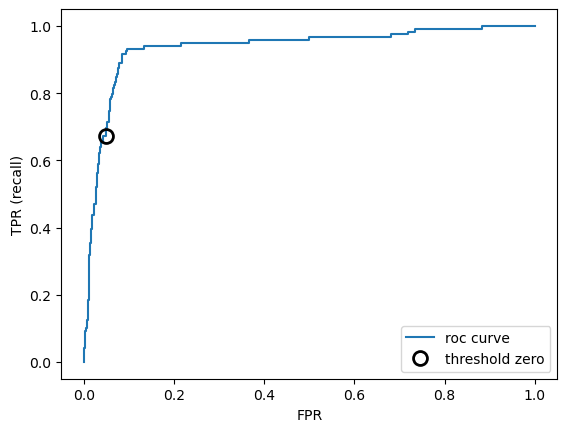

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='roc curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')

close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
                              label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend()
plt.show()

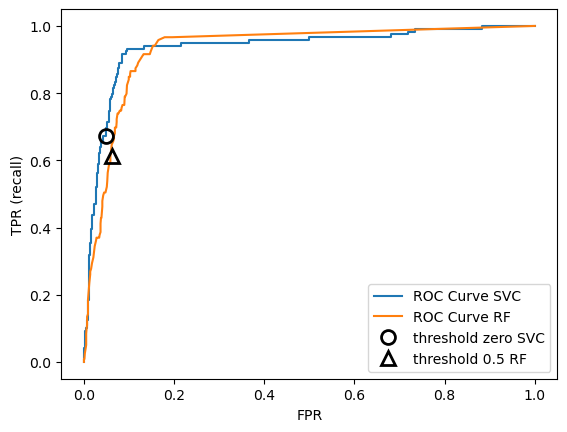

In [76]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
    label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print('랜덤 포레스트의 AUC: {:.2f}'.format(rf_auc))
print('SVC의 AUC: {:.2f}'.format(svc_auc))

랜덤 포레스트의 AUC: 0.93
SVC의 AUC: 0.94


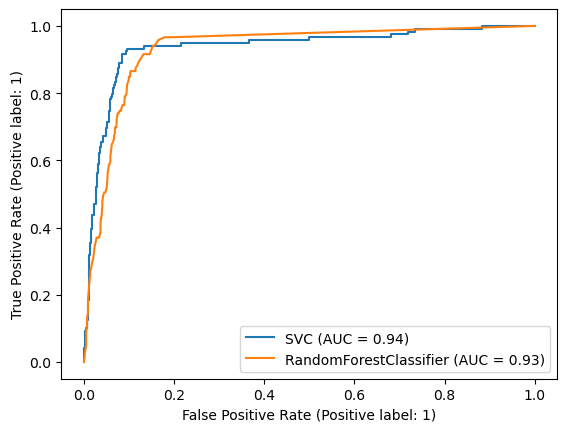

In [78]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

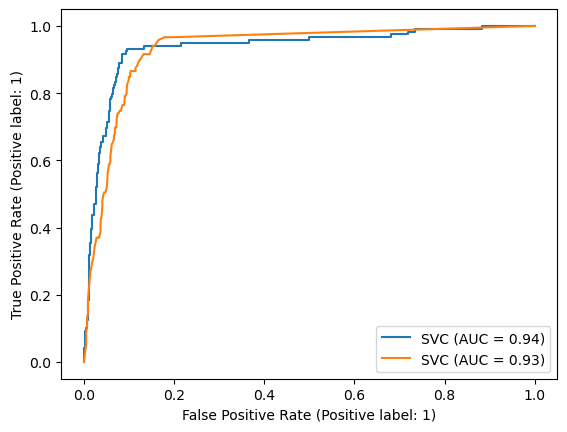

In [79]:
fig,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name= 'SVC', ax=ax)
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:,1], name= 'SVC', ax=ax)
plt.show()

gamma = 1.00 정확도 = 0.90 AUC = 0.50
gamma = 0.10 정확도 = 0.90 AUC = 0.96
gamma = 0.01 정확도 = 0.90 AUC = 1.00


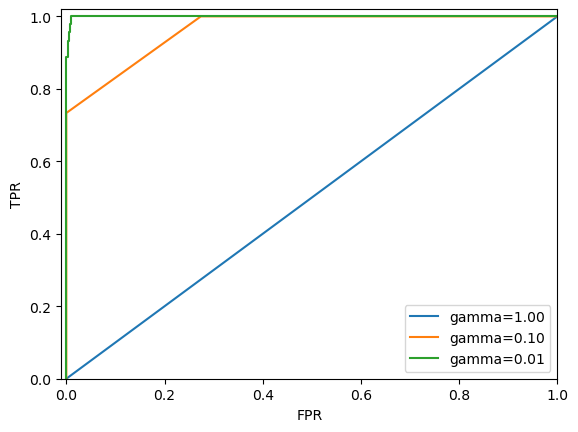

In [80]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=22)

plt.figure()

for gamma in [1, .1, .01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} 정확도 = {:.2f} AUC = {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr,tpr, label='gamma={:.2f}'.format(gamma))
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc='best')
plt.show()

In [81]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=22)

lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)

print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.969
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  1 49  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  1  0  0  0]
 [ 0  1  0  0  0 42  0  0  0  3]
 [ 0  2  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  4  1  0  1  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  0 45]]


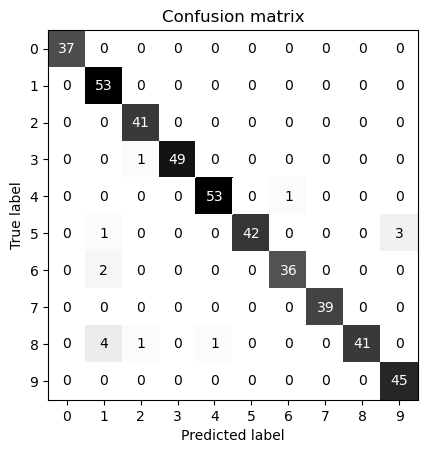

In [82]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")

plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.88      1.00      0.94        53
           2       0.95      1.00      0.98        41
           3       1.00      0.98      0.99        50
           4       0.98      0.98      0.98        54
           5       1.00      0.91      0.95        46
           6       0.97      0.95      0.96        38
           7       1.00      1.00      1.00        39
           8       1.00      0.87      0.93        47
           9       0.94      1.00      0.97        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [84]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.969
macro 평균 f1 점수: 0.970


In [85]:
print("기본 평가 지표:",
      cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))

explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)

ap =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.97562403 0.9886322  1.         0.99853801 0.95015534]


In [86]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.013114,0.037513,0.975000,0.994433,0.975624,0.994997,0.887346,0.972222
1,0.015643,0.031239,0.991667,0.995825,0.988632,0.996010,0.958333,0.982252
2,0.030746,0.020828,1.000000,0.995132,1.000000,0.995317,1.000000,0.978780
3,0.015608,0.015645,0.994429,0.995828,0.998538,0.995257,0.972222,0.982252
4,0.015634,0.031244,0.980501,0.996523,0.950155,0.999257,0.902778,0.985725


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [88]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)

print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896
